# Importing Libraries

In [3]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import requests
from io import BytesIO
import base64
from Binance_API import BinanceAPI
from RiskMetrics import RiskAnalysis, rolling_var,kupiec_test, performance
from PnL_Computation import PnL
from Stock_Data import get_close
from Rebalancing import *
from Git import *

In [4]:
# %run "Git.ipynb".ipynb

In [5]:
git=GitHub(token,repo_owner,repo_name,branch)

# Importing Data

## Tickers

In [8]:
Binance=BinanceAPI(binance_api_key,binance_api_secret)
Pnl_calculation=PnL(binance_api_key,binance_api_secret)

In [9]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [11]:
start_date=datetime.datetime(2023,12,1)
enddate=datetime.datetime.today()

In [12]:
quantities_api=Binance.binance_api.user_asset()

current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

In [13]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [14]:
# trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
url='https://github.com/niroojane/Risk-Management/raw/refs/heads/main/Trade%20History%20Reconstructed.xlsx'
myfile = requests.get(url)
trade_history=pd.read_excel(BytesIO(myfile.content))
trade_history

,Date(UTC),Market,Type,Price,Amount,Total,Fee,Fee Coin
0,2025-08-22 20:18:09,TRYBNB,SELL,5.448505e-07,6.020000,3.280000e-06,1.611800e-04,BNB
1,2025-08-22 20:18:09,BBBNB,SELL,3.279979e-06,0.012195,4.000000e-08,2.230000e-06,BNB
2,2025-08-22 20:18:09,JASMYBNB,SELL,1.827429e-05,0.901813,1.648000e-05,3.300000e-07,BNB
3,2025-08-22 20:15:46,TRXTRY,BUY,1.485200e+01,587.000000,8.718124e+03,2.683700e-04,BNB
4,2025-08-22 20:14:45,JASMYTRY,SELL,6.820000e-01,12792.000000,8.724144e+03,2.686100e-04,BNB
...,...,...,...,...,...,...,...,...
80,2024-05-09 22:32:57,TRXEUR,BUY,1.189828e-01,205.828142,2.500000e+01,5.100000e-01,EUR
81,2024-05-09 19:36:50,UMAEUR,BUY,3.803499e+00,6.438808,2.500000e+01,5.100000e-01,EUR
82,2024-05-06 23:27:11,ETHEUR,BUY,2.912269e+03,0.008407,2.500000e+01,5.100000e-01,EUR
83,2024-05-06 23:15:38,BTCEUR,BUY,5.989971e+04,0.000409,2.500000e+01,5.100000e-01,EUR


In [15]:
price=Pnl_calculation.get_trade_in_usdt(trade_history)

BNBUSDT 0
BNBUSDT 1
BNBUSDT 2
USDTTRY 3
USDTTRY 4
BNBUSDT 5
OMUSDT 6
OMUSDT 7
OMUSDT 8
TRXUSDT 9
BTCUSDT 10
BTCUSDT 11
TRXUSDT 12
BBUSDT 13
BNBUSDT 14
BTCUSDT 15
BTCUSDT 16
BTCUSDT 17
EURUSDT 18
EURUSDT 19
BBUSDT 20
BNBUSDT 21
JASMYUSDT 22
PEPEUSDT 23
NOTUSDT 24
NOTUSDT 25
NOTUSDT 26
BBUSDT 27
BBUSDT 28
PEPEUSDT 29
JASMYUSDT 30
BTCUSDT 31
BTCUSDT 32
BTCUSDT 33
BTCUSDT 34
BTCUSDT 35
BTCUSDT 36
BTCUSDT 37
BTCUSDT 38
BNBUSDT 39
JASMYUSDT 40
JASMYUSDT 41
ENSUSDT 42
ARUSDT 43
BTCUSDT 44
BTCUSDT 45
ETHUSDT 46
BTCUSDT 47
BTCUSDT 48
BTCUSDT 49
BTCUSDT 50
EURUSDT 51
BTCUSDT 52
BTCUSDT 53
EURUSDT 54
EURUSDT 55
EURUSDT 56
EURUSDT 57
EURUSDT 58
EURUSDT 59
EURUSDT 60
EURUSDT 61
EURUSDT 62
EURUSDT 63
EURUSDT 64
EURUSDT 65
EURUSDT 66
EURUSDT 67
EURUSDT 68
EURUSDT 69
EURUSDT 70
EURUSDT 71
EURUSDT 72
EURUSDT 73
EURUSDT 74
EURUSDT 75
EURUSDT 76
EURUSDT 77
EURUSDT 78
EURUSDT 79
EURUSDT 80
EURUSDT 81
EURUSDT 82
EURUSDT 83
EURUSDT 84


In [16]:
book_cost=Pnl_calculation.get_book_cost(price)
realized_pnl,profit_and_loss=Pnl_calculation.get_pnl(book_cost,price)
historical_positions=Pnl_calculation.get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

historical_positions.rename(columns={'TRYUSDT': 'USDTTRY'}, inplace=True)


In [17]:
realized_pnl_time=pd.DataFrame()
for key in profit_and_loss:

    temp=profit_and_loss[key]
    realized_pnl_time=pd.concat([realized_pnl_time,temp],axis=0)

realized_pnl_time.columns=realized_pnl_time.columns+'USDT'

realized_pnl_time=realized_pnl_time.sort_index().fillna(0)
realized_pnl_time.index=realized_pnl_time.index.strftime(date_format='%Y-%m-%d')
realized_pnl_time.groupby(realized_pnl_time.index).sum()
realized_pnl_time=realized_pnl_time.cumsum()
realized_pnl_time = realized_pnl_time[~realized_pnl_time.index.duplicated(keep='last')]
realized_pnl_time=realized_pnl_time.sum(axis=1)

C:\Users\niroo\AppData\Local\Temp\ipykernel_17004\1326421339.py:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  realized_pnl_time=pd.concat([realized_pnl_time,temp],axis=0)


In [18]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()


In [19]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:20].to_list()

In [20]:
holding=Binance.get_inventory()
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
holding_tickers.append('PAXGUSDT')
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Average Cost','Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.loc['Total','Average Cost']=np.nan

pnl.loc['Total','Book Cost']=pnl.loc['Total','Price in USDT']-pnl.loc['Total','Total PnL']
# pnl['Total PnL %']=pnl['Total PnL']/(pnl['Price in USDT']-pnl['Total PnL'])*100
pnl['Total PnL %']=pnl['Total PnL']/(pnl.loc['Total','Book Cost'])*100

pnl.sort_values(ascending=False,by='Price in USDT').round(2)


,Average Cost,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL,Total PnL %
Total,NaN,2187.45,2240.49,1.00,-273.57,326.61,53.04,2.42
BTCUSDT,70306.87,622.27,1020.02,0.46,2.80,397.75,400.55,18.31
TRXUSDT,0.20,216.87,389.28,0.17,-12.30,172.41,160.11,7.32
SOLUSDT,157.06,281.20,365.79,0.16,0.00,84.59,84.59,3.87
ETHUSDT,3654.53,253.39,331.85,0.15,0.00,78.45,78.45,3.59
OMUSDT,1.13,526.32,115.66,0.05,0.00,-410.66,-410.66,-18.77
BNBUSDT,680.96,13.83,17.91,0.01,-10.59,4.07,-6.52,-0.30
PEPEUSDT,0.00,0.00,0.00,0.00,-38.52,-0.00,-38.52,-1.76
TRYUSDT,0.04,0.00,0.00,0.00,-0.21,0.00,-0.21,-0.01
NOTUSDT,0.02,0.00,0.00,0.00,1.01,0.00,1.01,0.05


In [21]:
days=(enddate-start_date).days
remaining=days%500
numbers_of_table=days//500
remaining

132

In [22]:
# data1=Binance.get_price(tickers,start_date)
# data2=Binance.get_price(tickers,enddate)
# data=data1.combine_first(data2)
# data.index=pd.to_datetime(data.index)
# #data=data.dropna(axis=1)
# n=len(data.columns)
# data=data.sort_index()

In [23]:
temp_end=start_date
prices=pd.DataFrame()
for i in range(numbers_of_table+1):
    temp_data=Binance.get_price(tickers,temp_end)
    temp_end=temp_end+datetime.timedelta(500)
    prices=prices.combine_first(temp_data)
    
temp_end=temp_end+datetime.timedelta(500)
last_data=Binance.get_price(tickers,temp_end)
data=prices.combine_first(last_data)
data=data.sort_index()
data = data[~data.index.duplicated(keep='first')]

In [24]:
data.index=pd.to_datetime(data.index)
n=len(data.columns)
data=data.sort_index()

In [25]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [26]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [27]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [29]:
#position=pd.read_excel('Positions.xlsx',index_col=0)
url='https://github.com/niroojane/Risk-Management/raw/refs/heads/main/Positions.xlsx'
myfile = requests.get(url)
position=pd.read_excel(BytesIO(myfile.content),index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')
git.push_or_update_file(positions,'Positions')

🔁 File exists. Will update (SHA: 30681c613bff7552bae0f066bef9a95332ccb393)
✅ File pushed/updated successfully!


In [30]:
positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [31]:
url='https://github.com/niroojane/Risk-Management/raw/refs/heads/main/Quantities.xlsx'
myfile = requests.get(url)
quantities_history=pd.read_excel(BytesIO(myfile.content),index_col=0)
#quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

In [32]:
quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx',index=False)

quantities_tickers=list(quantities.columns)

In [33]:
git.push_or_update_file(quantities,'Quantities')

🔁 File exists. Will update (SHA: fdc5067fd75cda8bdc86d44ff1fea4db6edb71e7)
✅ File pushed/updated successfully!


In [34]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])
price_pnl.index=pd.to_datetime(price_pnl.index)

In [35]:
daily_book_cost=book_cost.resample("D").last().dropna().sort_index()

In [36]:
book_cost_history=pd.DataFrame()
book_cost_history.index=set(daily_book_cost.index.append(quantities.index))

book_cost_history=book_cost_history.sort_index()

for col in quantities:
    
    book_cost_history[col]=daily_book_cost[col]

book_cost_history=book_cost_history.ffill()
book_cost_history=book_cost_history.loc[quantities.index]

In [37]:
# pnl_history=pd.DataFrame()
# pnl_history.index=quantities.index
# pnl_history=pnl_history.sort_index()

# for col in quantities:
#     pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

# pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [38]:
# pnl_history['Total']

In [39]:
#pnl_history['Total']-pnl_history['Total'].shift(1)

In [40]:
realized_pnl_time2=pd.DataFrame()

realized_pnl_time2.index=quantities.index
realized_pnl_time2=realized_pnl_time2.sort_index()

realized_pnl_time2.index=realized_pnl_time2.index.strftime(date_format='%Y-%m-%d')

    
realized_pnl_time2=pd.concat([realized_pnl_time2,realized_pnl_time])

realized_pnl_time2=realized_pnl_time2.sort_index().fillna(0)
realized_pnl_time2.index=pd.to_datetime(realized_pnl_time2.index)
realized_pnl_time2.groupby(realized_pnl_time2.index).sum()

realized_pnl_time2 = realized_pnl_time2[~realized_pnl_time2.index.duplicated(keep='first')]

realized_pnl_time2.columns=['Realized PnL']

In [41]:
realized_pnl_time2=realized_pnl_time2.fillna(0)

In [42]:
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()

for col in quantities:
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

pnl_history['Total']=pnl_history.sum(axis=1)#+realized_pnl_time2['Realized PnL'].loc[quantities.index].cumsum().shift(-1).fillna(0)

In [43]:
pnl_history['Total']

2024-09-23   -260.603192
2024-09-24   -237.099853
2024-09-25   -254.360005
2024-09-26   -168.660788
2024-09-27   -152.141667
                 ...    
2025-08-18     -3.690311
2025-08-19    -77.716471
2025-08-20     -9.960669
2025-08-21    -60.632384
2025-08-22    344.642759
Name: Total, Length: 334, dtype: float64

<Axes: >

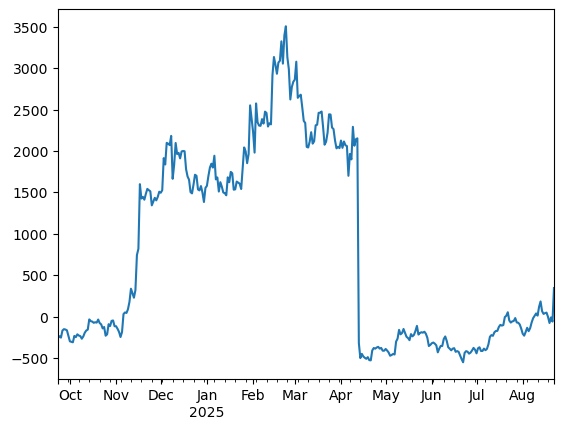

In [44]:
pnl_history['Total'].plot()

In [333]:
daily_pnl=pnl_history['Total']-pnl_history['Total'].shift(1)
daily_pnl[-31:]

2025-07-23    -99.585907
2025-07-24    -25.169421
2025-07-25     14.611312
2025-07-26      4.924152
2025-07-27     35.123826
2025-07-28    -52.773000
2025-07-29     -3.735193
2025-07-30    -20.315121
2025-07-31    -49.767968
2025-08-01    -62.484839
2025-08-02    -23.659997
2025-08-03     44.829219
2025-08-04     50.440091
2025-08-05    -41.020054
2025-08-06     36.413389
2025-08-07     68.439267
2025-08-08     52.086461
2025-08-09     28.618893
2025-08-10     28.580156
2025-08-11    -26.126058
2025-08-12    106.411481
2025-08-13     65.040275
2025-08-14   -116.944819
2025-08-15    -33.788702
2025-08-16      9.416085
2025-08-17      6.186404
2025-08-18    -51.411836
2025-08-19    -74.026161
2025-08-20     67.755802
2025-08-21    -50.671715
2025-08-22    405.275144
Name: Total, dtype: float64

In [46]:
days=0
pnl_timeframe=daily_pnl[-days:]
MtM=Binance.get_inventory().loc['Total']['Price in USDT']
var_amount=np.nanpercentile(pnl_timeframe,1)
var_pct=var_amount/MtM
cvar_amount=pnl_timeframe[pnl_timeframe<var_amount].mean()
cvar_pct=cvar_amount/MtM
var_amount,cvar_amount

(-370.8463524677856, -950.5160328166935)

In [47]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [48]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [49]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [50]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change(fill_method=None))


LDUMAUSDT not retrieved
Total not retrieved


In [51]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [52]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [53]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

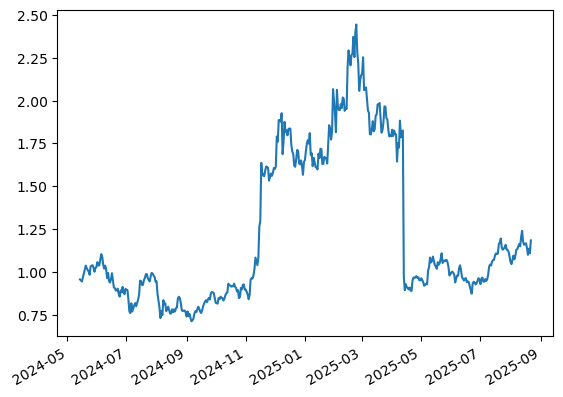

In [54]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()
plt.show()

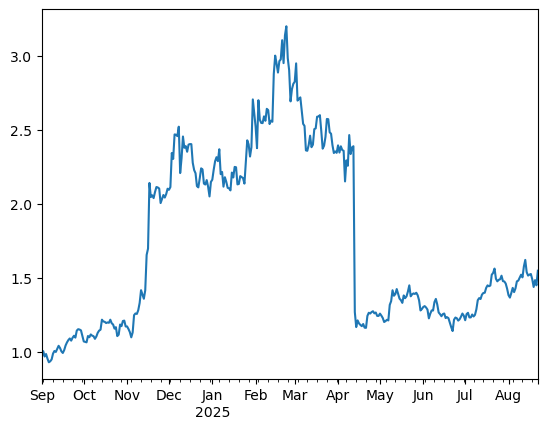

In [55]:
(1+historical_ptf['Historical Portfolio'].loc['2024-09':]).cumprod().plot()
plt.show()

## Ex ante data

In [57]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [386]:
days=90
historical_risk=RiskAnalysis(returns_to_use.iloc[-days:])
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[-days:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [388]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0]#,np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]
gold=np.where(returns_to_use.columns=='PAXGUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [392]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash]-0.00},
                                                                           {'type': 'eq', 'fun': lambda weights: 0.00-weights[gold]}])#,
                                                                              
                                                                              #{'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
TRXUSDT,0.5750
WBETHUSDT,0.1845
ETHUSDT,0.1258
ADAUSDT,0.0975
BCHUSDT,0.0172
PEPEUSDT,0.0000
OMUSDT,0.0000
DOGEUSDT,0.0000
SUIUSDT,0.0000
AVAXUSDT,0.0000


In [393]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.0},
                                                                          {'type': 'ineq', 'fun': lambda weights: 0.0-weights[gold]},
                                                                          {'type': 'ineq', 'fun': lambda weights: 0.0-weights[cash]}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']
inventory

,Optimal Weights
TRXUSDT,0.664810
WBETHUSDT,0.302208
BCHUSDT,0.032983


In [394]:
tickers_frontier=holding_tickers.copy()
tickers_frontier.extend(list(inventory.index))

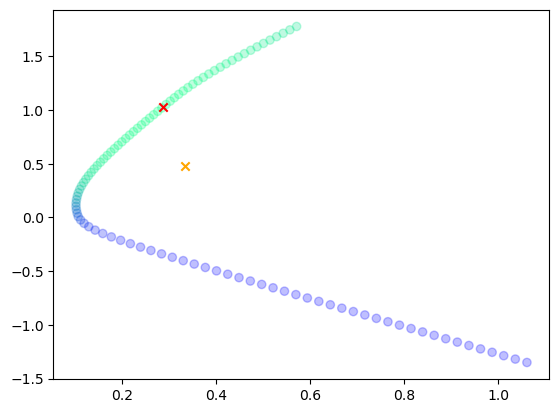

In [395]:
returns_frontier=returns_to_use[tickers_frontier].copy().iloc[-days:]
frontier_analysis=RiskAnalysis(returns_frontier)
current_weights_frontier=np.zeros(returns_frontier.shape[1])
current_weights_frontier[:current_weights.shape[0]]=current_weights
frontier_opt_weights=frontier_analysis.optimize(objective='sharpe_ratio')
X,Y,Z,C=frontier_analysis.efficient_frontier()
opt_res=frontier_analysis.performance(frontier_opt_weights),frontier_analysis.variance(frontier_opt_weights)
current_res=frontier_analysis.performance(current_weights_frontier),frontier_analysis.variance(current_weights_frontier)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')
plt.show()

In [396]:
dico={returns_frontier.columns[i]:frontier_opt_weights[i].round(4) for i in range(len(returns_frontier.columns))}
dico=pd.DataFrame(dico.values(),index=dico.keys(),columns=['Optimal Weights'])

In [397]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,dico],axis=1)
historical_comparison=historical_comparison.fillna(0)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison=historical_comparison.round(7)
historical_comparison.round(4)

,Price in USDT,Weights,Optimal Weights,Spread
BTCUSDT,1020.0191,0.4553,0.0000,0.4553
TRXUSDT,389.2770,0.1737,0.3077,-0.1340
SOLUSDT,365.7875,0.1633,0.0000,0.1633
ETHUSDT,331.8452,0.1481,0.0000,0.1481
OMUSDT,115.6595,0.0516,0.0000,0.0516
BNBUSDT,17.9061,0.0080,0.0000,0.0080
PEPEUSDT,0.0000,0.0000,0.0000,0.0000
PAXGUSDT,0.0000,0.0000,0.0710,-0.0710
WBETHUSDT,0.0000,0.0000,0.2806,-0.2806
BCHUSDT,0.0000,0.0000,0.0329,-0.0329


### Current results

In [402]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

gold_current=np.where(ex_ante_perf_to_use.columns=='PAXGUSDT')[0][0]

In [403]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: 0.00-weights[gold_current]}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
TRXUSDT,0.684139
ETHUSDT,0.315861


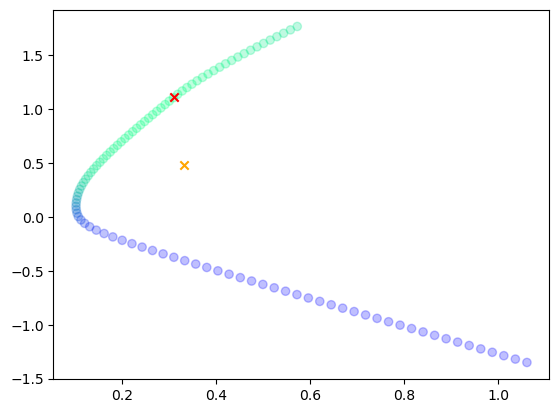

In [409]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')
plt.show()


In [411]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison=current_holding_comparison.round(7)
current_holding_comparison.round(4)

,Price in USDT,Weights,Optimal Weights,Spread
BTCUSDT,1020.0191,0.4553,0.0000,0.4553
TRXUSDT,389.2770,0.1737,0.6841,-0.5104
SOLUSDT,365.7875,0.1633,0.0000,0.1633
ETHUSDT,331.8452,0.1481,0.3159,-0.1677
OMUSDT,115.6595,0.0516,0.0000,0.0516
BNBUSDT,17.9061,0.0080,0.0000,0.0080
PEPEUSDT,0.0000,0.0000,0.0000,0.0000


# Risk Reward Analysis

In [76]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [77]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

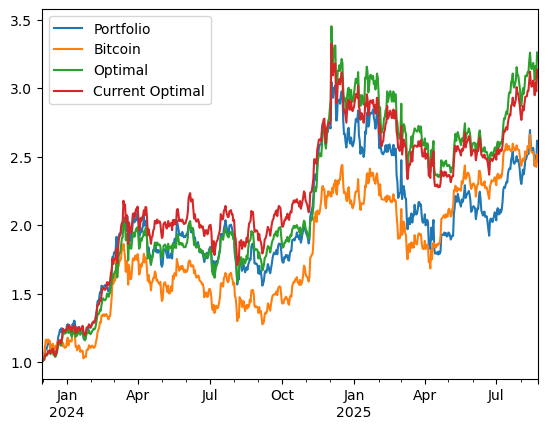

In [78]:
days=0
(1+portfolio_perf.iloc[-days:]).cumprod().plot()
plt.show()

In [79]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

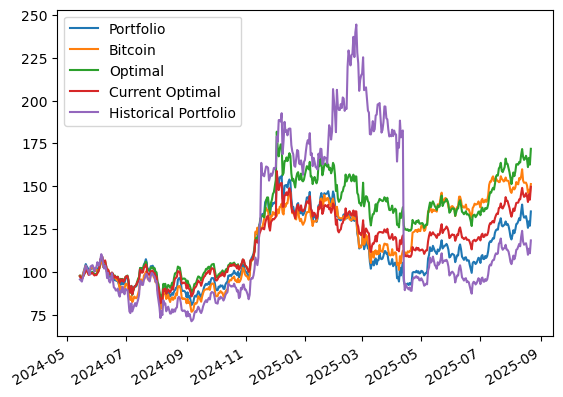

In [80]:
days=0
((1+current_perf.iloc[-days:]).cumprod()*100).plot()
plt.show()


<Axes: >

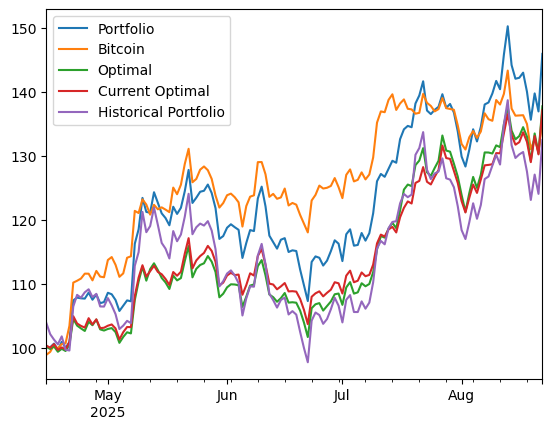

In [81]:
((1+current_perf.loc['2025-04-15':]).cumprod()*100).plot()

## Volatilities

In [83]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.378832
 dtype: float64,
 0.379130139212482)

In [84]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.427454
 dtype: float64,
 0.4274542953752448)

In [85]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.427454
Bitcoin            0.407048
Optimal            0.379130
Current Optimal    0.371399
dtype: float64

In [86]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.530926248581305

In [87]:
days=30
current_perf['Historical Portfolio'].iloc[-days:].mean()*252/(current_perf['Historical Portfolio'].iloc[-days:].std()*np.sqrt(252))

0.9198352920324412

<Axes: >

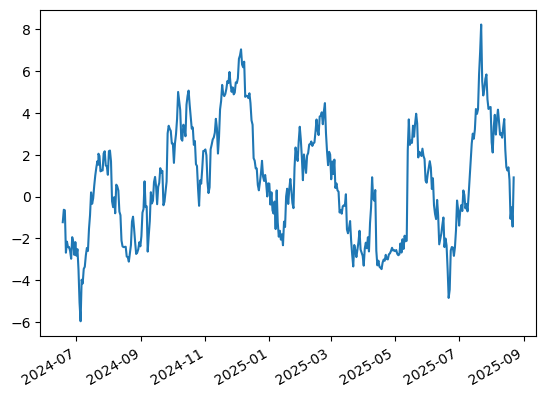

In [88]:
window=30
rolling_sharpe_ratio=current_perf['Historical Portfolio'].rolling(window).mean()*252/(current_perf['Historical Portfolio'].rolling(window).std()*np.sqrt(252))
rolling_sharpe_ratio.plot()

In [89]:
current_risk.performance(current_weights)/current_risk.variance(current_weights)

1.104313457161058

## Risk Contribution

In [91]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis.loc['Portfolio']=perf_analysis.sum(axis=0)
perf_analysis.round(4)

,Performance Contribution,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,83.9492,0.4144,0.2312,0.1833
WBTCUSDT,34.4985,0.1917,0.0606,0.1311
TRXUSDT,28.8731,0.1890,0.0976,0.0914
XRPUSDT,20.3004,0.1365,0.0435,0.0930
SUIUSDT,0.2096,0.0025,0.0000,0.0025
OMUSDT,-36.2700,0.0658,0.0277,0.0381
Portfolio,131.5609,1.0000,0.4607,0.5393


In [92]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis.loc['Portfolio']=perf_analysis.sum(axis=0)
perf_analysis

,Performance Contribution,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,86.529777,0.443318,0.255922,0.187396
BTCUSDT,47.216164,0.273776,0.121664,0.152111
TRXUSDT,30.753418,0.208932,0.115358,0.093574
OMUSDT,-39.260164,0.073974,0.033847,0.040127
Portfolio,125.239195,1.000000,0.526792,0.473208


In [93]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis.loc['Portfolio']=perf_analysis.sum(axis=0)
perf_analysis

,Performance Contribution,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BTCUSDT,68.245172,0.394789,0.191879,0.202910
TRXUSDT,24.190192,0.110009,0.053882,0.056127
SOLUSDT,12.712553,0.229534,0.073016,0.156518
ETHUSDT,8.100195,0.170952,0.041121,0.129831
BNBUSDT,2.035822,0.007048,0.000107,0.006942
OMUSDT,-48.369017,0.087667,0.038784,0.048883
Portfolio,66.914917,1.000000,0.398789,0.601211


# Value At Risk

## Historical

### Optimal Weights

In [97]:
var,cvar=historical_risk.historical_var(opt_weights,Q=1)
(var,cvar)

(-0.06455370628448615, -0.0812801874323273)

### Current Weights

In [99]:
var,cvar=current_risk.historical_var(current_weights,Q=1)
(var,cvar)

(-0.06814489623473467, -0.09039793938432165)

In [100]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.01
row=round(historical_var.shape[0]*centile)

In [101]:
var=historical_var.iloc[row]
var

BTCUSDT     -0.022415
TRXUSDT     -0.007168
SOLUSDT     -0.016133
ETHUSDT     -0.011075
OMUSDT      -0.010724
BNBUSDT     -0.000740
PEPEUSDT    -0.000000
PAXGUSDT     0.000000
Portfolio   -0.068255
Name: 2024-04-13 00:00:00, dtype: float64

In [102]:
cvar=historical_var.iloc[:row+1].mean()
cvar

BTCUSDT     -0.025985
TRXUSDT     -0.009893
SOLUSDT     -0.020317
ETHUSDT     -0.014857
OMUSDT      -0.018668
BNBUSDT     -0.000678
PEPEUSDT     0.000000
PAXGUSDT     0.000000
Portfolio   -0.090398
dtype: float64

## Parametric

### Optimal Weights

In [105]:
var,cvar=historical_risk.parametric_var(opt_weights,Q=0.99)

(var,cvar)

(-0.05556005898042833, -0.06881476754575526)

### Current Weights

In [107]:
var,cvar=current_risk.parametric_var(current_weights,Q=0.99)

(var,cvar)

(-0.0626417776012679, -0.07758593931303484)

## Multivariate

### Optimal Weights

In [110]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.05353005831256743, -0.06225551276850476)

### Current Weights

In [112]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06200598004939348, -0.07179397670022392)

In [113]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.01)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.01)]

    scenario_multivariate[i]=results.to_dict()

scenario=pd.DataFrame(scenario_multivariate).T
mean_scenario_multivariate=scenario.mean()
mean_scenario_multivariate

BTCUSDT     -0.024449
TRXUSDT     -0.005541
SOLUSDT     -0.013963
ETHUSDT     -0.010664
OMUSDT      -0.005586
BNBUSDT     -0.000406
Portfolio   -0.060610
dtype: float64

In [114]:
index_cvar=scenario['Portfolio']<mean_scenario_multivariate['Portfolio']
cvar_multivariate=scenario.loc[index_cvar].mean()
cvar_multivariate

BTCUSDT     -0.024074
TRXUSDT     -0.005732
SOLUSDT     -0.015177
ETHUSDT     -0.010957
OMUSDT      -0.005248
BNBUSDT     -0.000423
Portfolio   -0.061611
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [118]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.053319242037855145, -0.06089353144595752)

### Current Weights

In [120]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.059487515274763876, -0.06900060986797169)

In [121]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.01)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.01)]
    
    scenario_gaussian[i]=results

scenario=pd.DataFrame(scenario_gaussian).T
mean_scenario_gaussian=scenario.mean()

index_cvar=scenario['Portfolio']<mean_scenario_gaussian['Portfolio']
cvar_gaussian=scenario.loc[index_cvar].mean()

## Student Copula

### Optimal Weights

In [124]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.054216474842373935, -0.06256554323939544)

### Current Weights

In [126]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.06462464704224806, -0.07425076789435725)

In [127]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.01)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.01)]
    
    scenario_t_copula[i]=results
    
scenario=pd.DataFrame(scenario_t_copula).T
mean_scenario_student=scenario.mean()

index_cvar=scenario['Portfolio']<mean_scenario_student['Portfolio']
cvar_student=scenario.loc[index_cvar].mean()

## Gumbel Copula

### Optimal Weights

In [130]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.0845398990306717, -0.10335338176367052)

### Current Weights

In [132]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.0893514517391064, -0.10688105551332322)

In [133]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    

scenario=pd.DataFrame(scenario_gumbel_copula).T
mean_scenario_gumbel=scenario.mean()

index_cvar=scenario['Portfolio']<mean_scenario_gumbel['Portfolio']
cvar_gumbel=scenario.loc[index_cvar].mean()

## Monte Carlo

### Optimal

In [136]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [137]:
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.05726990547658447, -0.06580078530000603)

### Current Weights

In [139]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,1)
cvar=perf[perf<var].mean()

var,cvar

(-0.06275629486768833, -0.07171056490531975)

In [140]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results

scenario=pd.DataFrame(scenario_monte_carlo).T
mean_scenario_monte_carlo=scenario.mean()

index_cvar=scenario['Portfolio']<mean_scenario_monte_carlo['Portfolio']
cvar_monte_carlo=scenario.loc[index_cvar].mean()

In [141]:
summary_var=pd.concat([mean_scenario_gumbel,mean_scenario_gaussian,mean_scenario_monte_carlo,mean_scenario_multivariate,mean_scenario_student],axis=1)
summary_var.columns=['Gumbel','Gaussian','Monte Carlo','Multivariate','Student']
summary_var

,Gumbel,Gaussian,Monte Carlo,Multivariate,Student
BTCUSDT,-0.030433,-0.023743,-0.016300,-0.024449,-0.024952
TRXUSDT,-0.008217,-0.006030,-0.005650,-0.005541,-0.006544
SOLUSDT,-0.009153,-0.013977,-0.009626,-0.013963,-0.014520
ETHUSDT,-0.005687,-0.010588,-0.007521,-0.010664,-0.011071
OMUSDT,-0.003835,-0.005970,-0.005669,-0.005586,-0.005892
BNBUSDT,0.000067,-0.000398,-0.000295,-0.000406,-0.000397
Portfolio,-0.057258,-0.060705,-0.045061,-0.060610,-0.063377


In [142]:
summary_cvar=pd.concat([cvar_gumbel,cvar_gaussian,cvar_monte_carlo,cvar_multivariate,cvar_student],axis=1)
summary_cvar.columns=['Gumbel','Gaussian','Monte Carlo','Multivariate','Student']
summary_cvar

,Gumbel,Gaussian,Monte Carlo,Multivariate,Student
BTCUSDT,-0.029645,-0.023445,-0.016479,-0.024074,-0.024824
TRXUSDT,-0.009372,-0.006483,-0.006111,-0.005732,-0.006828
SOLUSDT,-0.009819,-0.013786,-0.009956,-0.015177,-0.015622
ETHUSDT,-0.003182,-0.010676,-0.007484,-0.010957,-0.010306
OMUSDT,-0.006219,-0.006681,-0.005174,-0.005248,-0.006244
BNBUSDT,0.000202,-0.000406,-0.000325,-0.000423,-0.000367
Portfolio,-0.058035,-0.061477,-0.045530,-0.061611,-0.064190


## VaR Violation

In [144]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2023-12-30,-0.030720,-0.040792,-0.034732,0.007377
2023-12-31,-0.030720,-0.040940,-0.034932,-0.001590
2024-01-01,-0.030720,-0.041086,-0.034541,0.014823
2024-01-02,-0.030720,-0.041013,-0.034892,0.005124
2024-01-03,-0.030720,-0.041809,-0.036923,-0.019312
...,...,...,...,...
2025-08-19,-0.028792,-0.041661,-0.041812,-0.028659
2025-08-20,-0.028792,-0.043917,-0.042535,0.033306
2025-08-21,-0.028792,-0.044715,-0.045241,-0.023630
2025-08-22,-0.028126,-0.049019,-0.045453,0.056847


In [145]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2023-12-15,-0.053163,-0.057569,-0.051913,-0.036100
2023-12-16,-0.053163,-0.057314,-0.051333,0.009732
2023-12-17,-0.053163,-0.057626,-0.054134,-0.020193
2023-12-18,-0.053163,-0.058719,-0.055236,0.021425
2023-12-19,-0.053163,-0.057559,-0.055482,-0.008973
...,...,...,...,...
2025-08-19,-0.039149,-0.053016,-0.052266,-0.031282
2025-08-20,-0.039149,-0.054811,-0.050830,0.030383
2025-08-21,-0.039149,-0.055896,-0.055656,-0.020216
2025-08-22,-0.039149,-0.066727,-0.062672,0.065813


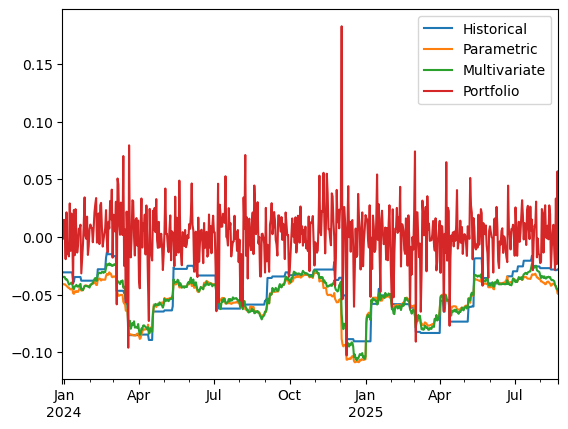

In [146]:
var_data.plot()
plt.show()

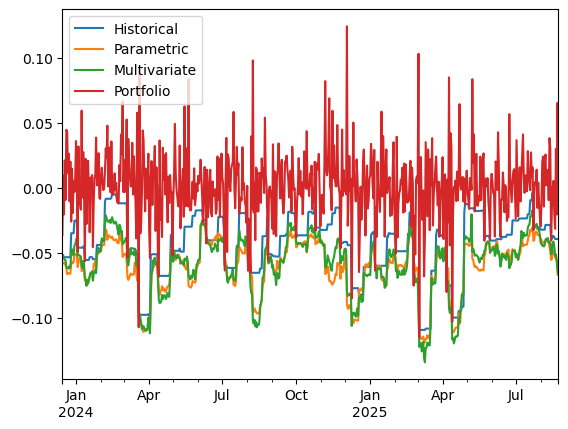

In [147]:
current_var_data.plot()
plt.show()


In [148]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.029851,0.018242,0.016584
Kupiec Stat,5.986622,16.750783,18.928612
P-value,0.014415,0.000043,0.000014


In [149]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.069579,0.014563,0.012945
Kupiec Stat,4.469288,22.403373,25.060795
P-value,0.034509,0.000002,0.000001


# Principal Component Analysis

## Historical PCA

In [152]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.58815121, 0.23900951, 0.08071317, 0.05272575, 0.03940036])

In [153]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

ADAUSDT      0.064158
AVAXUSDT     0.064367
BCHUSDT      0.048700
BNBUSDT      0.028249
BTCUSDT      0.032605
DOGEUSDT     0.066984
ETHUSDT      0.047756
HBARUSDT     0.064296
LINKUSDT     0.060146
LTCUSDT      0.044919
OMUSDT       0.075342
PAXGUSDT     0.000660
PEPEUSDT     0.085001
SOLUSDT      0.056449
SUIUSDT      0.061887
TRXUSDT      0.018018
USDCUSDT    -0.000162
WBETHUSDT    0.047746
WBTCUSDT     0.032392
XLMUSDT      0.050718
XRPUSDT      0.049770
Name: PC1, dtype: float64

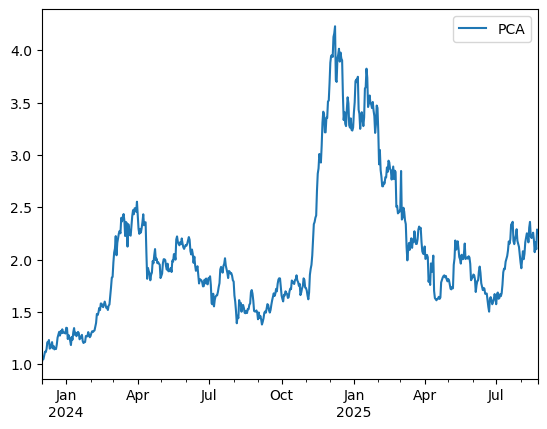

In [154]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()
plt.show()

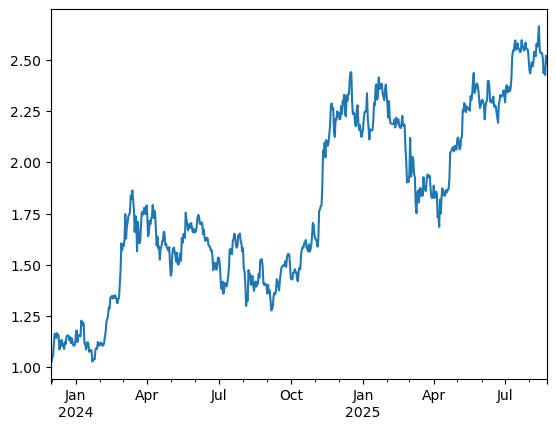

In [155]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()
plt.show()


In [156]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances[:20]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
WBETHUSDT    0.506475
ETHUSDT      0.507023
WBTCUSDT     0.546010
BTCUSDT      0.547032
AVAXUSDT     0.670512
SOLUSDT      0.677889
LINKUSDT     0.695077
DOGEUSDT     0.699227
BNBUSDT      0.712002
LTCUSDT      0.715045
ADAUSDT      0.727546
XRPUSDT      0.752897
BCHUSDT      0.834493
XLMUSDT      0.902976
USDCUSDT     0.943257
PAXGUSDT     0.954450
SUIUSDT      1.081497
TRXUSDT      1.087997
HBARUSDT     1.104630
dtype: float64

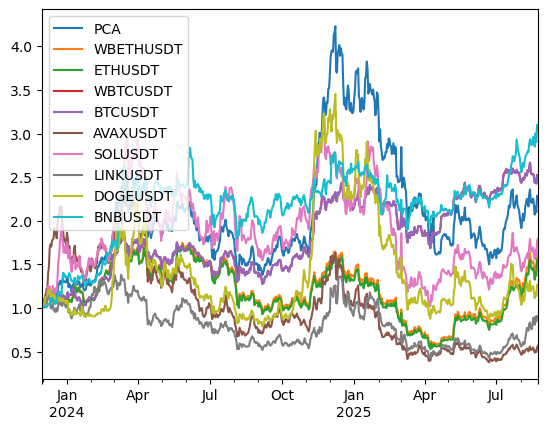

In [157]:
(1+comparison[distances.index[:10]]).cumprod().plot()
plt.show()

<Axes: >

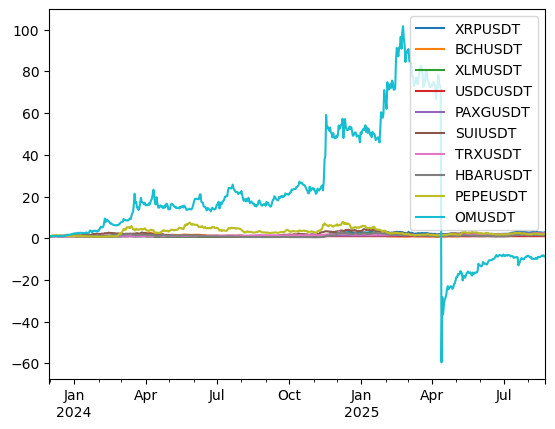

In [158]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [160]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.55389204, 0.30678997, 0.06854559, 0.04834932, 0.02242308])

In [161]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

BTCUSDT     0.061523
TRXUSDT     0.033431
SOLUSDT     0.112671
ETHUSDT     0.086320
OMUSDT      0.480522
BNBUSDT     0.054549
PEPEUSDT    0.169304
PAXGUSDT    0.001680
Name: PC1, dtype: float64

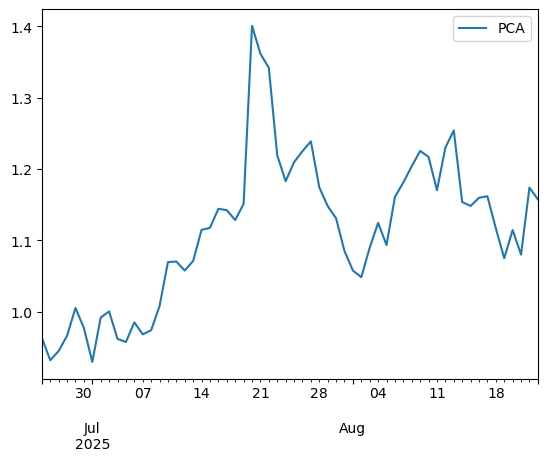

In [162]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA.iloc[-60:]).cumprod().plot()
plt.show()

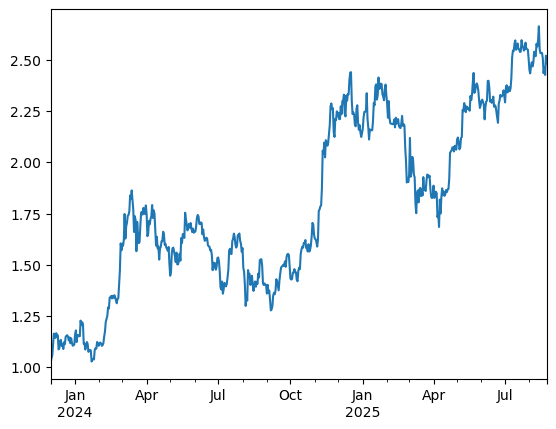

In [163]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()
plt.show()


In [164]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA         0.000000
BTCUSDT     1.303539
ETHUSDT     1.317010
SOLUSDT     1.338343
OMUSDT      1.358642
BNBUSDT     1.371815
PAXGUSDT    1.505999
TRXUSDT     1.604741
PEPEUSDT    1.732578
dtype: float64

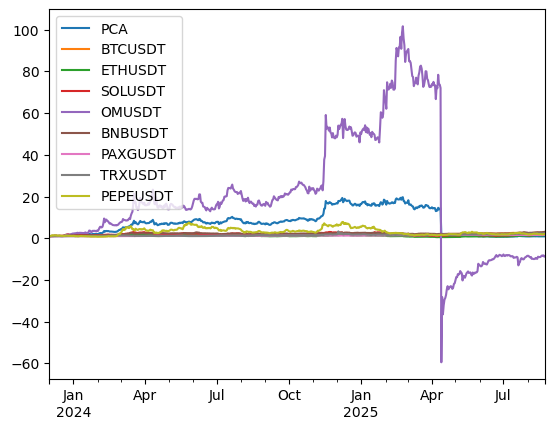

In [165]:
(1+comparison[distances.index[:10]]).cumprod().plot()
plt.show()


## Sensitivity Analysis

In [167]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT    1.922336
SOLUSDT     1.293310
ETHUSDT     1.106331
BTCUSDT     1.000000
OMUSDT      0.999948
BNBUSDT     0.670603
TRXUSDT     0.334480
PAXGUSDT    0.029989
Name: BTCUSDT, dtype: float64

In [168]:
days=30
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

ETHUSDT     2.105669
PEPEUSDT    2.090551
SOLUSDT     1.984840
OMUSDT      1.662189
BNBUSDT     1.232034
BTCUSDT     1.000000
TRXUSDT     0.555021
PAXGUSDT    0.114068
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [170]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [171]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
PEPEUSDT,0.221083
BNBUSDT,0.220877
ETHUSDT,0.216207
PAXGUSDT,0.211469
OMUSDT,0.142713
BTCUSDT,0.134781
SOLUSDT,0.130258
TRXUSDT,0.006126


### Regression to PCA

In [173]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-30:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

1.3793513898787728

In [174]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT     1.202556
PCA         1.000000
BNBUSDT     0.883439
ETHUSDT     0.873948
SOLUSDT     0.661936
PEPEUSDT    0.382615
TRXUSDT     0.323227
PAXGUSDT    0.209993
OMUSDT      0.162428
dtype: float64

In [175]:
reg=ex_ante_perf.copy().dropna().iloc[-30:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT     1.848466
PAXGUSDT    1.801531
BNBUSDT     1.178879
TRXUSDT     1.047062
PCA         1.000000
SOLUSDT     0.832163
ETHUSDT     0.796372
PEPEUSDT    0.727988
OMUSDT      0.707866
dtype: float64

### Correlation Matrix

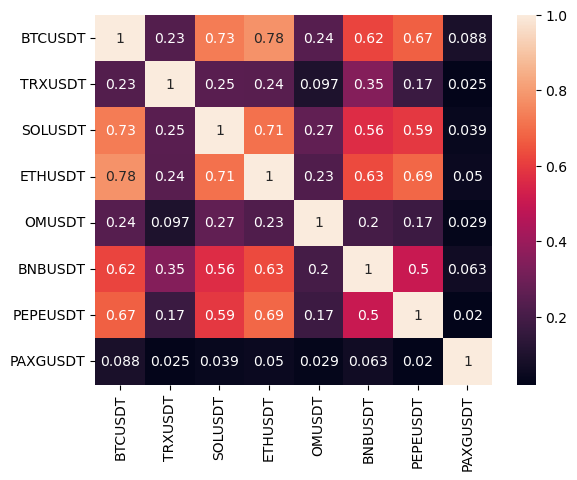

In [177]:
sns.heatmap(ex_ante_perf.corr(),annot=True)
plt.show()


<Axes: >

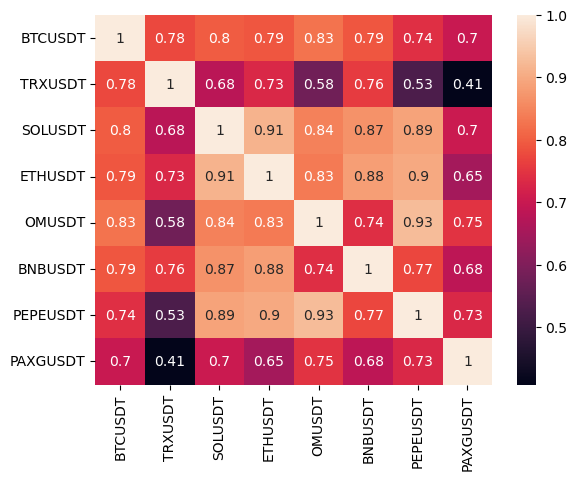

In [178]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

In [179]:
gold=get_close(['SPY','GOLD.PA'],start=start_date.strftime("%Y-%m-%d"),end=enddate.strftime("%Y-%m-%d")).dropna()
gold.index=pd.to_datetime(gold.index)
pct_change=gold.pct_change().sort_index()

In [180]:
correlation=pct_change['GOLD.PA'].rolling(30).corr(pct_change['SPY']).dropna()
beta=(pct_change['GOLD.PA'].rolling(30).cov(pct_change['SPY']).dropna()/pct_change['SPY'].rolling(30).var().dropna())

<Axes: >

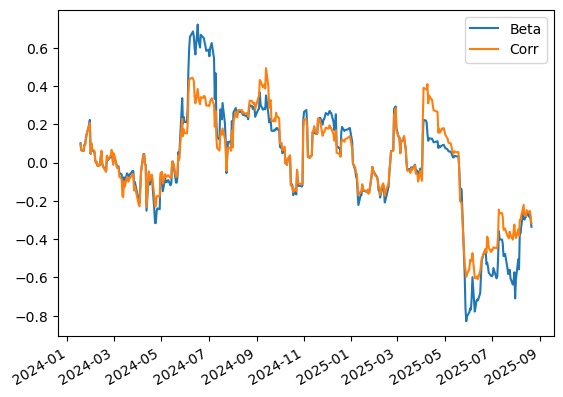

In [181]:
info=pd.DataFrame()
info['Beta']=beta
info['Corr']=correlation

info.plot()

## Sliding window optimization

In [183]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,BTCUSDT,TRXUSDT,SOLUSDT,ETHUSDT,OMUSDT,BNBUSDT,PEPEUSDT,PAXGUSDT
2023-12-14,0.107613,0.000000,0.000000,0.000000,0.104338,0.522522,0.000000,0.265527
2023-12-28,0.000000,0.000000,0.331762,0.000000,0.000000,0.668238,0.000000,0.000000
2024-01-11,0.000000,0.000000,0.000000,0.439739,0.560261,0.000000,0.000000,0.000000
2024-01-25,0.000000,0.379486,0.000000,0.000000,0.104620,0.000000,0.000000,0.515894
2024-02-08,0.000000,0.066364,0.041760,0.191143,0.047113,0.000000,0.000000,0.653620
2024-02-22,0.000000,0.705974,0.000000,0.164223,0.000000,0.129803,0.000000,0.000000
2024-03-07,0.000000,0.000000,0.156080,0.020832,0.000000,0.000000,0.046602,0.776486
2024-03-21,0.000000,0.000000,0.000000,0.000000,0.462471,0.471815,0.065714,0.000000
2024-04-04,0.000920,0.000000,0.000000,0.000000,0.019296,0.113904,0.000000,0.865879
2024-04-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [184]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='PAXGUSDT')[0][0]

In [185]:
for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit[0]]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,ADAUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BTCUSDT,DOGEUSDT,ETHUSDT,HBARUSDT,LINKUSDT,LTCUSDT,...,PAXGUSDT,PEPEUSDT,SOLUSDT,SUIUSDT,TRXUSDT,USDCUSDT,WBETHUSDT,WBTCUSDT,XLMUSDT,XRPUSDT
2025-01-15,0.106751,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.893249
2025-02-14,0.106751,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.680288,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2025-03-16,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2025-04-15,0.106750,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.366574,0.0,0.0,0.000000,0.526675,0.0,0.000000,0.000000,0.000000,0.000000
2025-05-15,0.106751,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.132093,...,0.304262,0.0,0.0,0.153689,0.180130,0.0,0.000000,0.123075,0.000000,0.000000
2025-06-14,0.000000,0.0,0.135655,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.864345,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2025-07-14,0.106751,0.0,0.206331,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.220059,0.466859
2025-08-13,0.106751,0.0,0.000000,0.0,0.0,0.0,0.083302,0.0,0.000000,0.056118,...,0.000000,0.0,0.0,0.000000,0.489708,0.0,0.264121,0.000000,0.000000,0.000000
2025-08-23,0.106751,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.893249,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [186]:
rolling_optimization.iloc[-2].sort_values(ascending=False)[:6]

TRXUSDT      0.489708
WBETHUSDT    0.264121
ADAUSDT      0.106751
ETHUSDT      0.083302
LTCUSDT      0.056118
PEPEUSDT     0.000000
Name: 2025-08-13 00:00:00, dtype: float64

<Axes: >

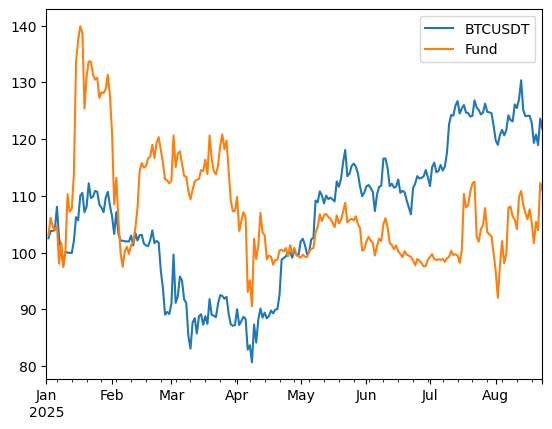

In [187]:
q=rebalanced_dynamic_quantities(data[returns_to_use.columns],rolling_optimization)
ptf=q*data[returns_to_use.columns]
comparison=pd.DataFrame()
comparison['BTCUSDT']=data['BTCUSDT']
comparison['Fund']=ptf.sum(axis=1)
((1+comparison.loc['2025'].pct_change()).cumprod()*100).plot()

In [188]:
(ptf-rebalanced_book_cost(data[returns_to_use.columns],q)).iloc[-1].sort_values(ascending=False)

XRPUSDT      335.332035
BCHUSDT       25.406152
TRXUSDT       17.395473
PAXGUSDT       3.995032
WBETHUSDT      1.041660
WBTCUSDT       0.793873
ETHUSDT        0.264048
AVAXUSDT       0.000000
SOLUSDT        0.000000
PEPEUSDT       0.000000
LINKUSDT       0.000000
HBARUSDT       0.000000
DOGEUSDT       0.000000
BTCUSDT        0.000000
BNBUSDT        0.000000
USDCUSDT       0.000000
XLMUSDT       -2.043736
OMUSDT        -3.698312
LTCUSDT       -9.025693
SUIUSDT      -14.113800
ADAUSDT      -44.656089
Name: 2025-08-23 00:00:00, dtype: float64

In [189]:
git.create_or_replace_notebook("Prod.ipynb")

File 'Prod.ipynb' exists. Replacing the file...
✅ File 'Prod.ipynb' successfully pushed/updated to GitHub!
